<a href="https://colab.research.google.com/github/TeodoraBarburiceanu/Exercise1/blob/main/Halftoning_profect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
StudentName = "Barburiceanu Teodora Ghilvacs Tudor "
StudentSpecialization = "TST-Engleza " 
print("This work is realised by:") 
print(StudentName,  "-" , StudentSpecialization)

This work is realised by:
Barburiceanu Teodora Ghilvacs Tudor  - TST-Engleza 


In [3]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import math
from google.colab.patches import cv2_imshow


In [23]:
img_filename='tiger.jpg'
img=cv2.imread(img_filename,0)
img = cv2.resize(img, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)

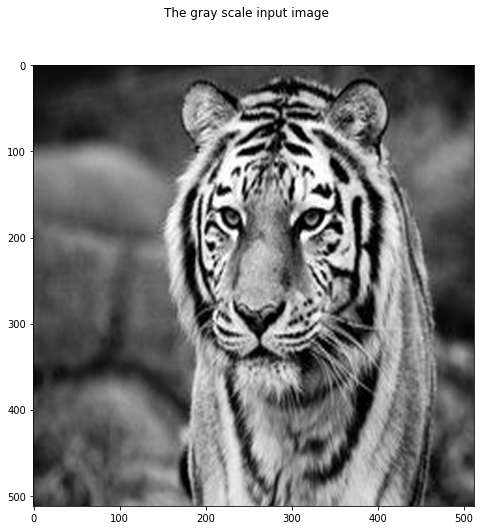

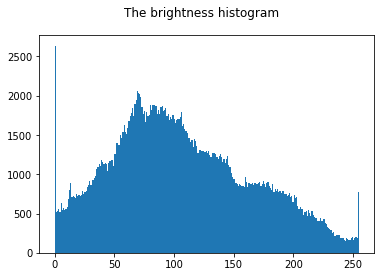

In [32]:
H,W=img.shape
DPI=72
plt.figure(figsize=(W/DPI+1,H/DPI+1))
plt.imshow(img,cmap = 'gray')
plt.suptitle('The gray scale input image') 
plt.show() 
plt.hist(img.ravel(),256,[0,255]) 
plt.suptitle('The brightness histogram') 
plt.show()


In [38]:
def bayers(img):
    img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_CUBIC)
    img=np.float32(img)
    img=np.divide(img,255)
    sz=(512,512)
    im=np.zeros(sz)

### Bayer's Dispersed Dot

    DA=np.array([[0, 48, 12, 60, 3, 51, 15, 63],
    [32, 16, 44, 28, 35, 19, 47, 31],
    [8, 56, 4, 52, 11, 59, 7, 55],
    [40, 24, 36, 20, 43, 27, 39, 23],
    [2, 50, 14, 62, 1, 49, 13, 61],
    [34, 18, 46, 30, 33, 17, 45, 29],
    [10, 58, 6, 54, 9, 57, 5, 53],
    [42, 26, 38, 22, 41, 25, 37, 21]])
    DA=np.divide(DA,[63])
    t=np.tile(DA,(64,64))
    out=img>t
    im[out]=255
    H,W=im.shape
    DPI=72
    plt.figure(figsize=(W/DPI+1,H/DPI+1))
    plt.imshow(im,cmap = 'gray')
    plt.suptitle('The Bayer dispersed dot output image') 
    plt.show() 



    # ## Bayer's Clustered Dot

    DA=[[24, 10, 12, 26, 35, 47, 49, 37],
    [8, 0, 2, 14, 45, 59, 61, 51],
    [22, 6, 4, 16, 43, 57, 63, 53],
    [30, 20, 18, 28, 33, 41, 55, 39],
    [34, 46, 48, 36, 25, 11, 13, 27],
    [44, 58, 60, 50, 9, 1, 3, 15],
    [42, 56, 62, 52, 23, 7, 5, 17],
    [32, 40, 54, 38, 31, 21, 19, 29]]
    DA=np.divide(DA,[63])
    t=np.tile(DA,(64,64))
    out=img>t
    im[out]=255
    plt.figure(figsize=(W/DPI+1,H/DPI+1))
    plt.imshow(im,cmap = 'gray')
    plt.suptitle('The Bayer clustered dot output image') 
    plt.show() 

    
   

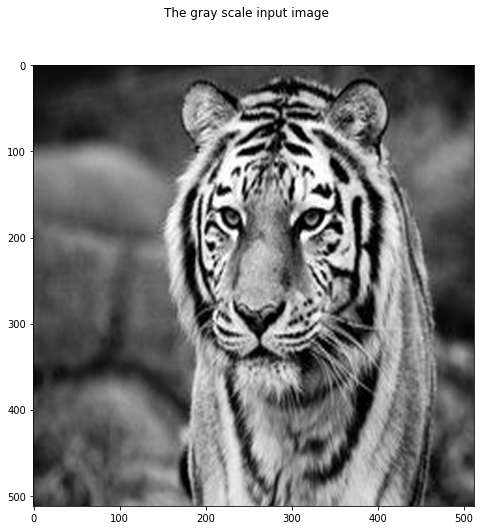

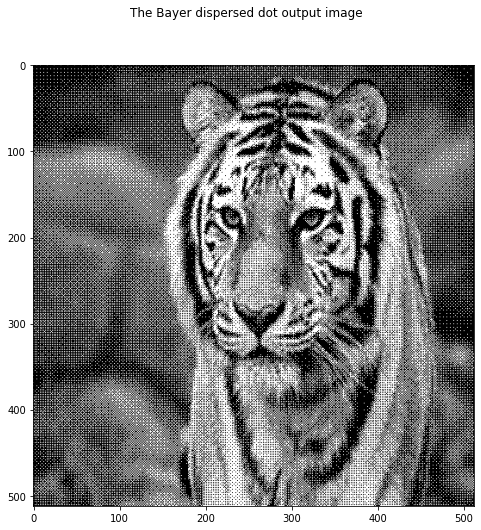

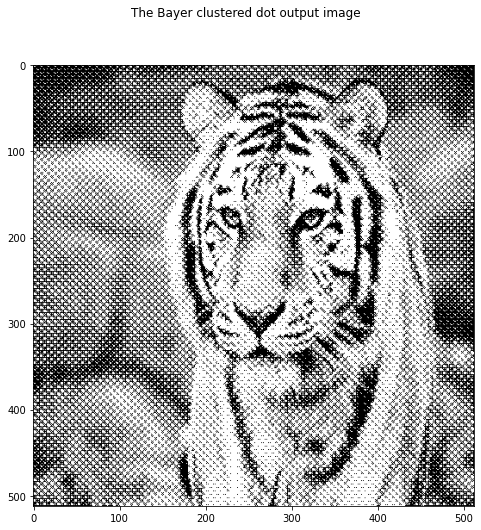

In [39]:
H,W=img.shape
DPI=72
plt.figure(figsize=(W/DPI+1,H/DPI+1))
plt.imshow(img,cmap = 'gray')
plt.suptitle('The gray scale input image') 
plt.show() 
bayers(img) 

In [40]:
def Ulichney(img):
    img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_CUBIC)
    img=np.float32(img)
    img=np.divide(img,255)
    sz = (512, 512)
    im = np.zeros(sz)

    ### Ulichney's Clustered Dot

    DA=np.array([[12, 5, 6, 13],
                 [4, 0, 1, 7],
                 [11, 3, 2, 8],
                 [15, 10, 9, 14]])
    DA=np.divide(DA,[15])
    t=np.tile(DA,(128,128))
    out=img>t
    im[out]=255
    H,W=im.shape
    DPI=72
    plt.figure(figsize=(W/DPI+1,H/DPI+1))
    plt.imshow(im,cmap = 'gray')
    plt.suptitle('The Ulichney clustered dot(4x4) output image') 
    plt.show() 

### Ulichney's Clustered Dot
    DA=np.array([[0.567, 0.635, 0.608, 0.514, 0.424, 0.365, 0.392, 0.486],
             [0.847, 0.878, 0.910, 0.698, 0.153, 0.122, 0.090, 0.302],
             [0.820, 0.969, 0.941, 0.667, 0.180, 0.031, 0.059, 0.333],
             [0.725, 0.788, 0.757, 0.545, 0.275, 0.212, 0.243, 0.455],
             [0.424, 0.365, 0.392, 0.486, 0.567, 0.635, 0.608, 0.514],
             [0.153, 0.122, 0.090, 0.302, 0.847, 0.878, 0.910, 0.698],
             [0.180, 0.031, 0.059, 0.333, 0.820, 0.969, 0.941, 0.667],
             [0.275, 0.212, 0.243, 0.455, 0.725, 0.788, 0.757, 0.545]])
    t=np.tile(DA,(64,64))
    out=img>t
    im[out]=255
    plt.figure(figsize=(W/DPI+1,H/DPI+1))
    plt.imshow(im,cmap = 'gray')
    plt.suptitle('The Ulichney clustered dot(8x8) output image') 
    plt.show()

    ### Ulichney's Void Dispersed Dot
    sz = (504, 504)
    im = np.zeros(sz)
    img = cv2.resize(img, dsize=(504,504), interpolation=cv2.INTER_CUBIC)

    DA = np.array([[131, 187, 8, 78, 50, 18, 134, 89, 155, 102, 29, 95, 184, 73],
                   [22, 86, 113, 171, 142, 105, 34, 166, 9, 60, 151, 128, 40, 110],
                   [168, 137, 45, 28, 64, 188, 82, 54, 124, 189, 80, 13, 156, 56],
                   [7, 61, 186, 121, 154, 6, 108, 177, 24, 100, 38, 176, 93, 123],
                   [83, 148, 96, 17, 88, 133, 44, 145, 69, 161, 139, 72, 30, 181],
                   [115, 27, 163, 47, 178, 65, 164, 14, 120, 48, 5, 127, 153, 52],
                   [190, 58, 126, 81, 116, 21, 106, 77, 173, 92, 191, 63, 99, 12],
                   [76, 144, 4, 185, 37, 149, 192, 39, 135, 23, 117, 31, 170, 132],
                   [35, 172, 103, 66, 129, 79, 3, 97, 57, 159, 70, 141, 53, 94],
                   [114, 20, 49, 158, 19, 146, 169, 122, 183, 11, 104, 180, 2, 165],
                   [152, 87, 182, 118, 91, 42, 67, 25, 84, 147, 43, 85, 125, 68],
                   [16, 136, 71, 10, 193, 112, 160, 138, 51, 111, 162, 26, 194, 46],
                   [174, 107, 41, 143, 33, 74, 1, 101, 195, 15, 75, 140, 109, 90],
                   [32, 62, 157, 98, 167, 119, 179, 59, 36, 130, 175, 55, 0, 150]])
    DA=np.divide(DA,[196])
    t = np.tile(DA, (36, 36))
    out = img > t
    im[out] = 255
    plt.figure(figsize=(W/DPI+1,H/DPI+1))
    plt.imshow(im,cmap = 'gray')
    plt.suptitle('The Ulichney clustered dot(14x14) output image') 
    plt.show()

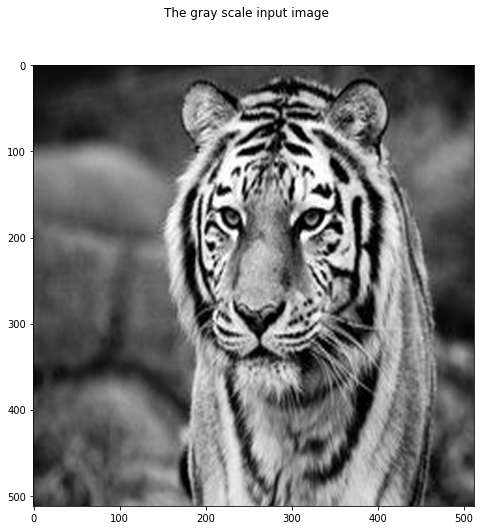

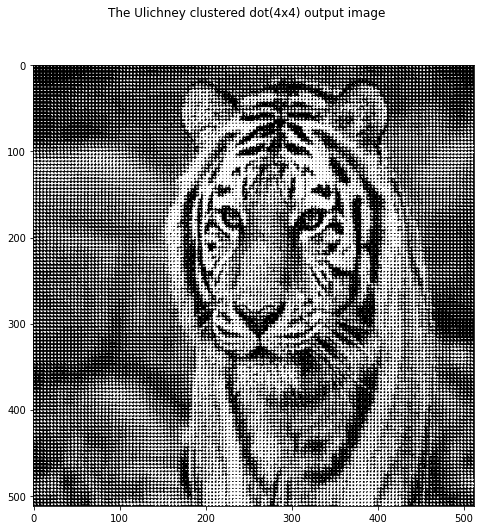

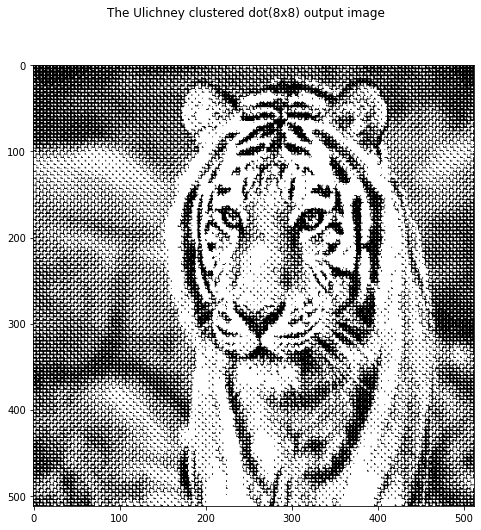

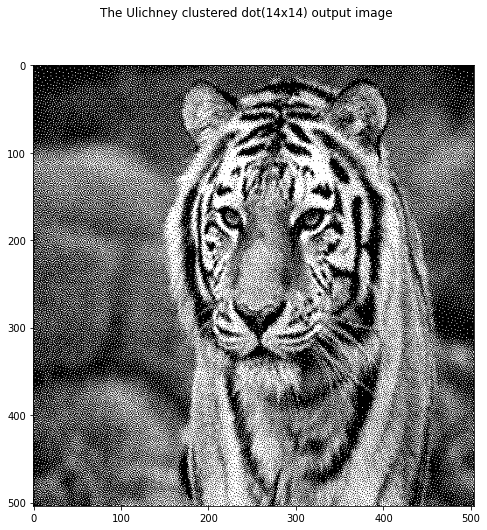

In [41]:
H,W=img.shape
DPI=72
plt.figure(figsize=(W/DPI+1,H/DPI+1))
plt.imshow(img,cmap = 'gray')
plt.suptitle('The gray scale input image') 
plt.show() 
Ulichney(img)

In [48]:
def errordiff(img):
    img = cv2.resize(img, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
    im=np.zeros((514,514))
    out=np.zeros((514,514))
    im[1:513,1:513]=img

    fc=[[0,0,7.0],
        [3.0, 5.0,1.0]]
    fc=np.divide(fc,[16])
    fc=np.float32(fc)

    for x in range(1, 512, 1):
        for y in range(1, 512, 1):
            xc=float(im[x,y])
            xm=float(im[x,y])
            xc=xc>128
            t=int(xc)*255
            out[x,y]=t
            diff=np.subtract(t,xm)
            fc1=np.multiply(fc,diff)
            im[x:x+2,y:y+3]=im[x:x+2,y:y+3]-fc1

    out=out[1:513,1:513]

    H,W=out.shape
    DPI=72
    plt.figure(figsize=(W/DPI+1,H/DPI+1))
    plt.imshow(out,cmap = 'gray')
    plt.suptitle('The Error diffusion output image') 
    plt.show() 
   



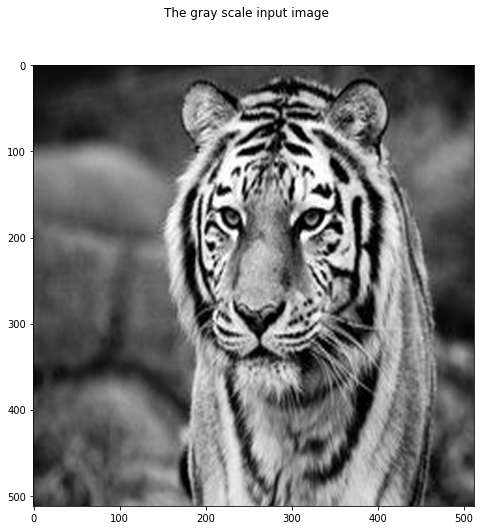

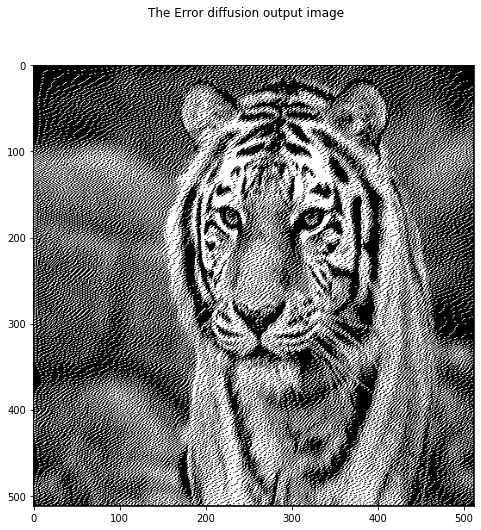

In [49]:
H,W=img.shape
DPI=72
plt.figure(figsize=(W/DPI+1,H/DPI+1))
plt.imshow(img,cmap = 'gray')
plt.suptitle('The gray scale input image') 
plt.show() 
errordiff(img)